https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DST-3.0+28FEB2021/block-v1:SkillFactory+DST-3.0+28FEB2021+type@sequential+block@2bfba3b2be4b41bc8685b5fc9be80592/block-v1:SkillFactory+DST-3.0+28FEB2021+type@vertical+block@13f7e6cc17244f08b070e2698e5d2f65

Ансамблевые модели или просто ансамбли (ensembles) — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Существует три проверенных способа построения ансамблей:

* Бэггинг — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
* Бустинг — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
* Стекинг — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

# БЭГГИНГ. ОСНОВНЫЕ ИДЕИ

В 1906 г. в городе Плимут (Великобритания) на сельской ярмарке был проведён эксперимент. Фрэнсис Гальтон в качестве развлечения посетителей ярмарки предложил им на глаз оценить вес выставленного на всеобщее обозрение быка. За правильные ответы организаторы шоу обещали призы. В результате в голосовании приняли участие около 800 человек — как заядлых фермеров, так и людей, далёких от скотоводческих дел. Собрав после этой ярмарки все результаты, Гальтон высчитал среднее арифметическое значение для всей выборки — 1197 фунтов. Реальный же вес быка оказался 1198 фунтов. Каким-то непостижимым образом разношерстная публика дала ответ, максимально приближенный к реальному показателю. То есть ответ публики был точнее, чем ответ отдельно взятого эксперта, например мясника или скотовода.

По схожему принципу «голосования толпы» и работает бэггинг.

Бэггинг (bagging) — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

# СЛУЧАЙНЫЙ ЛЕС

Случайный лес (Random Forest) — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 

Помимо бутстрэпа, случайный лес использует [метод случайных подпространств](https://en.wikipedia.org/wiki/Random_subspace_method). Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.

## АЛГОРИТМ ПОСТРОЕНИЯ СЛУЧАЙНОГО ЛЕСА ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

1. С помощью бутстрэпа создать K наборов данных размера (N, M).
2. Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
3. На каждом наборе данных обучить K деревьев решений.

Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

Ниже приведена схема работы описанного алгоритма для решения задачи классификации. Для простоты лес состоит из четырёх деревьев (K=4).

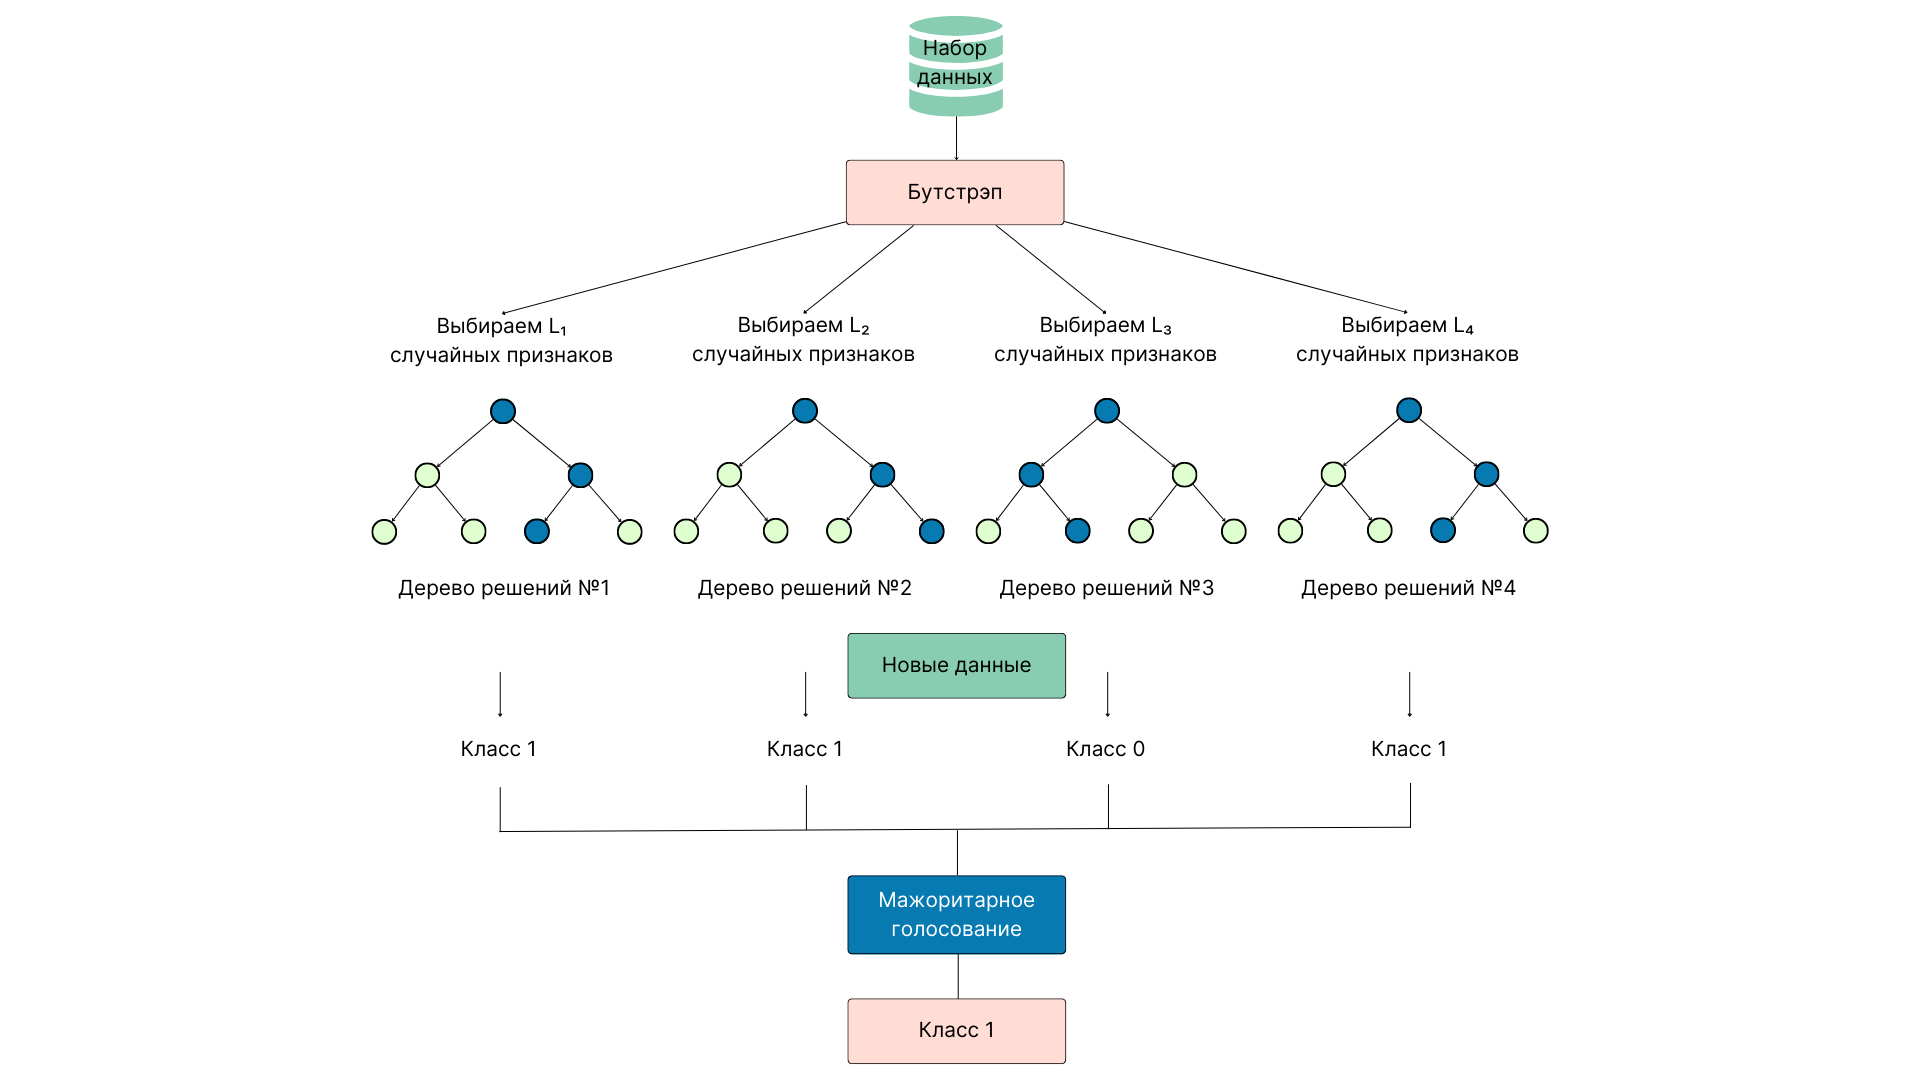

Метод случайных подпространств случайным образом выбирает из всех доступных признаков . Это обеспечивает независимость деревьев друг от друга и уменьшает шанс того, что деревья получатся одинаковыми.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import metrics #метрики
from sklearn import tree #модели деревьев решения
from sklearn import ensemble

7.5 Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. Хорошим вином будем называть вино, параметр quality которого  6, плохим — всё остальное.

In [3]:
wine_data = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

Затем разделим выборку на тренировочную и тестовую:

In [4]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите на тренировочной выборке (X_train, y_train) модель случайного леса, состоящего из 500 деревьев. Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. В качестве критерия информативности используйте критерий Джини. Количество признаков, на которых обучается каждое из деревьев, возьмите как кв. корень из m, где m — общее количество признаков. В качестве значения параметра random_state возьмите число 42.

Сделайте предсказание качества вина для тренировочного и тестового наборов данных.

Рассчитайте метрику accuracy для каждого набора и запишите её в качестве ответа с точностью до двух знаков после точки-разделителя.

In [6]:
#Создаём объект класса RandomForestClassifier
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    min_samples_leaf=10, #минимальное число объектов в листе
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X_train, y_train)
 
#Делаем предсказание класса
y_pred_test = rf_clf_2d.predict(X_test)
#Выводим отчёт о метриках
print(metrics.classification_report(y_test, y_pred_test))

y_pred_train = rf_clf_2d.predict(X_train)

print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       141
           1       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       603
           1       0.87      0.84      0.85       676

    accuracy                           0.85      1279
   macro avg       0.85      0.85      0.85      1279
weighted avg       0.85      0.85      0.85      1279

